# 딥러닝 구조 및 학습

* 딥러닝 구조와 학습에 필요한 요소
  - **모델(네트워크)**를 구성하는 **레이어(layer)**
  - **입력 데이터**와 그에 대한 **목적(결과)**
  - 학습시에 사용할 피드백을 정의하는 **손실 함수(loss function)**
  - 학습 진행 방식을 결정하는 **옵티마이저(optimizer)**

## 레이어(Layer)

* 신경망의 핵심 데이터 구조
* 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
* 상태가 없는 레이어도 있지만, 대부분 **가중치(weight)**라는 레이어 상태를 가짐
* 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

* Keras에서 사용되는 주요 레이어
  - Dense
  - Activation
  - Flatten
  - Input

In [12]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Activation, Flatten, Input

### Dense

* 완전연결계층(Fully-Connected Layer)
* 노드수(유닛수), 활성화 함수(`activation`) 등을 지정
* `name`을 통한 레이어간 구분 가능

* 가중치 초기화(`kernel_initializer`)
  - 신경망의 성능에 큰 영향을 주는 요소  
  - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용
  - 특정 구조의 신경망을 동일한 학습 데이터로 학습시키더라도, 가중치의 초기값에 따라 학습된 신경망의 성능 차이가 날 수 있음
  - 오차역전파 알고리즘은 기본적으로 경사하강법을 사용하기 때문에 최적해가 아닌 지역해에 빠질 가능성이 있음
  - Keras에서는 기본적으로 Glorot uniform 가중치(Xavier 분포 초기화), zeros bias로 초기화
  - `kernel_initializer` 인자를 통해 다른 가중치 초기화 지정 가능
  - Keras에서 제공하는 가중치 초기화 종류: https://keras.io/api/layers/initializers/

In [3]:
Dense(10, activation='softmax')

<Dense name=dense, built=False>

In [4]:
Dense(10, activation='relu', name='Dense Layer')

<Dense name=Dense Layer, built=False>

In [5]:
Dense(10, kernel_initializer='he_normal', name='Dense Layer')

<Dense name=Dense Layer, built=False>

### Activation

- Dense layer에서 미리 활성화 함수를 지정할 수도 있지만 필요에 따라 별도 레이어를 만들어줄 수 있음
- Keras에서 제공하는 활성화 함수(activation function) 종류: https://keras.io/ko/activations/

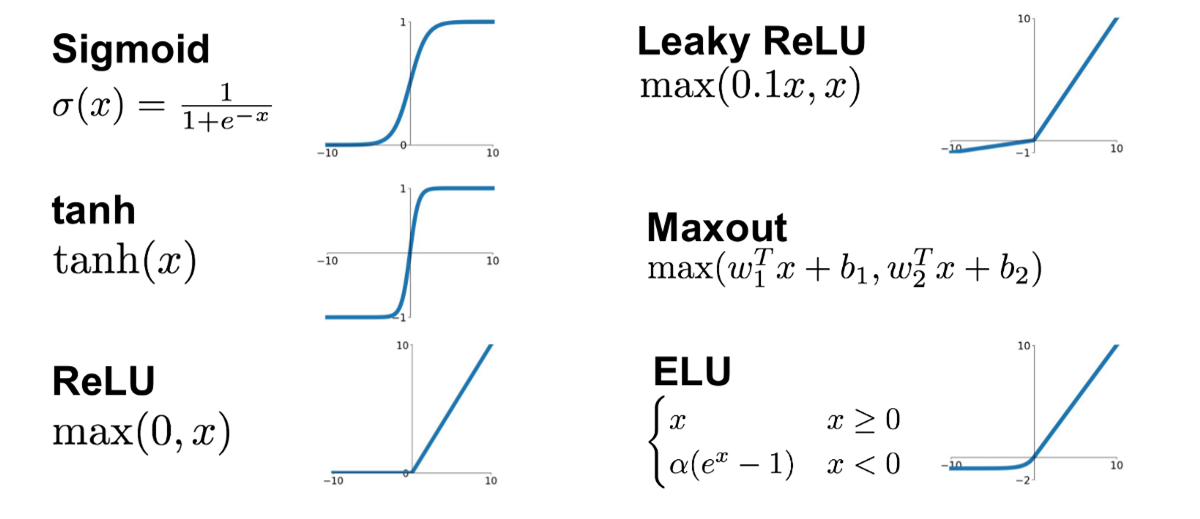

In [6]:
dense = Dense(10, activation='relu', name='Dense Layer')
Activation(dense)

<Activation name=activation, built=False>

### Flatten

- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
        (128, 3, 2, 2) -> (128, 12)
      

In [8]:
Flatten(input_shape=(128, 3, 2, 2))

<Flatten name=flatten_1, built=False>

### Input

- 모델의 입력을 정의
- `shape`, `dtype`을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음
- `summary()` 메소드를 통해서는 보이지 않음

In [14]:
Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=None, name=keras_tensor>

In [15]:
Input(shape=(8,), dtype=tf.float32)

<KerasTensor shape=(None, 8), dtype=float32, sparse=None, name=keras_tensor_1>